In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Введение
https://habr.com/ru/post/514818/

Есть три сходных между собой понятия: интерполяция, аппроксимация и регрессия. У них общая цель: из семейства функций выбрать ту, которая обладает определенным свойством.

Интерполяция — способ выбрать из семейства функций ту, которая проходит через заданные точки. Часто функцию затем используют для вычисления в промежуточных точках. Например, мы вручную задаем цвет нескольким точкам и хотим чтобы цвета остальных точек образовали плавные переходы между заданными. Или задаем ключевые кадры анимации и хотим плавные переходы между ними. Классические примеры: интерполяция полиномами Лагранжа, сплайн-интерполяция, многомерная интерполяция (билинейная, трилинейная, методом ближайшего соседа и т.д). Есть также родственное понятие экстраполяции — предсказание поведения функции вне интервала. Например, предсказание курса доллара на основании предыдущих колебаний — экстраполяция.

Аппроксимация — способ выбрать из семейства «простых» функций приближение для «сложной» функции на отрезке, при этом ошибка не должна превышать определенного предела. Аппроксимацию используют, когда нужно получить функцию, похожую на данную, но более удобную для вычислений и манипуляций (дифференцирования, интегрирования и т.п). При оптимизации критических участков кода часто используют аппроксимацию: если значение функции вычисляется много раз в секунду и не нужна абсолютная точность, то можно обойтись более простым аппроксимантом с меньшей «ценой» вычисления. Классические примеры включают ряд Тейлора на отрезке, аппроксимацию ортогональными многочленами, аппроксимацию Паде, аппроксимацию синуса Бхаскара и т.п.

Регрессия — способ выбрать из семейства функций ту, которая минимизирует функцию потерь. Последняя характеризует насколько сильно пробная функция отклоняется от значений в заданных точках. Если точки получены в эксперименте, они неизбежно содержат ошибку измерений, шум, поэтому разумнее требовать, чтобы функция передавала общую тенденцию, а не точно проходила через все точки. В каком-то смысле регрессия — это «интерполирующая аппроксимация»: мы хотим провести кривую как можно ближе к точкам и при этом сохранить ее максимально простой чтобы уловить общую тенденцию. За баланс между этими противоречивыми желаниями как-раз отвечает функция потерь (в английской литературе «loss function» или «cost function»)

Цель регрессии — найти коэффициенты этой линейной комбинации, и тем самым определить регрессионную функцию  (которую также называют моделью). Отмечу, что линейную регрессию называют линейной именно из-за линейной комбинации базисных функций — это не связано с самыми базисными функциями (они могут быть линейными или нет).

Впервые метод опубликовал Лежандр в 1805 году, хотя Гаусс пришел к нему раньше и успешно использовал для предсказания орбиты «кометы» (на самом деле карликовой планеты) Цереры. Существует множество вариантов и обобщений линейной регрессии: LAD, метод наименьших квадратов, Ridge регрессия, Lasso регрессия, ElasticNet и многие другие. https://scikit-learn.ru/1-1-linear-models/

В простом случае мы имеем известное вам со школы линейное уранвение, где зависимая пременная  определяется независимой переменной

In [2]:
data = {
    'Выпрыгивания_10_сек': [8, 9, 16, 15, 15, 17, 16, 18],
    'Отжимания': [20, 20, 25, 40, 35, 30, 29, 27],
    'Сила_удара': [250, 300, 500, 600, 630, 620, 480, 550]
}
df = pd.DataFrame(data)
df

,Выпрыгивания_10_сек,Отжимания,Сила_удара
0,8,20,250
1,9,20,300
2,16,25,500
3,15,40,600
4,15,35,630
5,17,30,620
6,16,29,480
7,18,27,550


Линейная регрессия

Показывает линейную модель и прогноз, прогнозируя Y из X.

Использует величину достоверности аппроксимации для измерения процента вариации, которая объясняется моделью.

Не использует X и Y как взаимозаменяемые значения (поскольку Y предсказывается из X).

Используем билиотеку scikit-learn для построения линейной регрессионной модели. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Разделим наши данные на зависимую и независимые переменные. Обучим нашу модель на имеющихся данных

In [3]:
from sklearn.linear_model import LinearRegression

X, y = df[['Выпрыгивания_10_сек', 'Отжимания']], df['Сила_удара']

lr = LinearRegression(fit_intercept= False, normalize=True)

lr.fit(X,y)

pd.DataFrame({"Коэфф-ты уравнения":lr.coef_}, index=['Выпрыгивания_10_сек', 'Отжимания'])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,Коэфф-ты уравнения
Выпрыгивания_10_сек,18.965541
Отжимания,8.014818


В результате нами была получена формула связывающая упражнения и, которую можно использовать для планирования тренировочного процесса:

Сила удара = 19 х Отжимания + 8 х Выпрыгивания_10_сек

Таким образом возможно проследить связь между отдельными переменными и более обоснованно подходить к вопросам планирования тренировочной нагрузки и тактики соревновательной деятельности.

In [4]:
print("Коэфф-т детерминации - ", lr.score(X,y))

Коэфф-т детерминации -  0.8937631373055038


Для проверки модели проведём ещё одни замеры на которых она не обучалась и, результаты которых ей надо будет предсказать.

In [5]:
new_data = {
    'Выпрыгивания_10_сек': [17, 16],
    'Отжимания': [30, 29]
}

test_res =  [560, 520]


In [6]:
x_res = lr.predict(pd.DataFrame(new_data))
x_res

array([562.85873403, 535.87837502])

коэффициент детерминации R² может быть определён разными способами

In [7]:
print("Коэфф-т детерминации - ", lr.score(pd.DataFrame(new_data),test_res))

Коэфф-т детерминации -  0.6746310581686508


In [8]:
from sklearn.metrics import r2_score

r2_score(test_res, x_res)

0.6746310581686508

Определим погрешность допущенную при применении нашей модели по методу наименьших квадратов (MSE). https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Root Mean Squared Deviation RMSD напрямую связана с MSE — значение этой меры равно корню квадратному из значения MSE для заданных наборов/
RMSD отсутствует в sklearn, однако мы можем с легкостью вычислить значение этой метрики.

In [9]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_res, x_res), mean_squared_error(test_res, x_res)**0.5

(130.14757673253968, 11.408224083201542)

При наличии "выбросов" иногда лучше использовать оценку Mean Absolute Error MAE (Средняя Абсолютная Ошибка) — меру схожести предсказаний и правильных значений для каких-либо наблюдений по модулю разности. Метрики и оценки: количественная оценка качества прогнозов https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

rmse = np.sqrt(mean_squared_error(test_res, x_res))
r2 = r2_score(test_res, x_res)
print('RMSE:', rmse)
print('R2:', r2)
print("MAE: ", mean_absolute_error(test_res, x_res))

RMSE: 11.408224083201542
R2: 0.6746310581686508
MAE:  9.368554522400814


Часто бывает полезно усложнить модель, учитывая нелинейные особенности входных данных. Простой и распространенный метод использования — это полиномиальные функции, которые могут получить термины высокого порядка и взаимодействия функций. Реализован в PolynomialFeatures

MSE: 32.65615734077501
R2: 0.9416007742063925


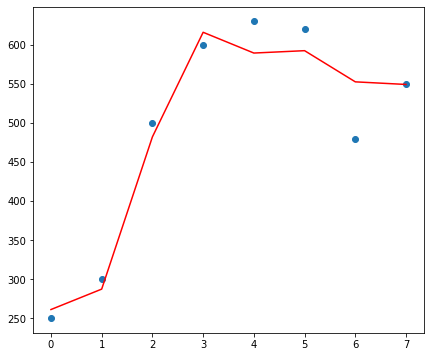

In [11]:
from sklearn.preprocessing import PolynomialFeatures
x, y = df[['Выпрыгивания_10_сек', 'Отжимания']], df['Сила_удара']

# sklearn генерирует допольнительное кол-во признаков для полиномиальной регресии
polynomial_features = PolynomialFeatures(degree=2) # указываем вторую степень полинома
x_poly = polynomial_features.fit_transform(x) # получаем новые признаки

model = LinearRegression(fit_intercept= False) 
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.figure(figsize=(7,6))

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('MSE:', rmse)
print('R2:', r2)
plt.scatter(df['Сила_удара'].index, df['Сила_удара'])

plt.plot(df['Сила_удара'].index, y_poly_pred, color='r')
plt.show()

In [12]:
x_res = model.predict(polynomial_features.fit_transform(pd.DataFrame(new_data)))
x_res, r2_score(test_res, x_res)

(array([592.56659195, 552.61404731]), -1.6553237413861677)

In [13]:
pd.DataFrame({"перем-я":PolynomialFeatures(degree=2).fit(x).get_feature_names(x.columns), 
              "коэф-т":model.coef_})

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,перем-я,коэф-т
0,1,98.138805
1,Выпрыгивания_10_сек,3.276951
2,Отжимания,0.649696
3,Выпрыгивания_10_сек^2,-1.733846
4,Выпрыгивания_10_сек Отжимания,2.618941
5,Отжимания^2,-0.461500


MSE: 4.834030647877921e-12
R2: 1.0


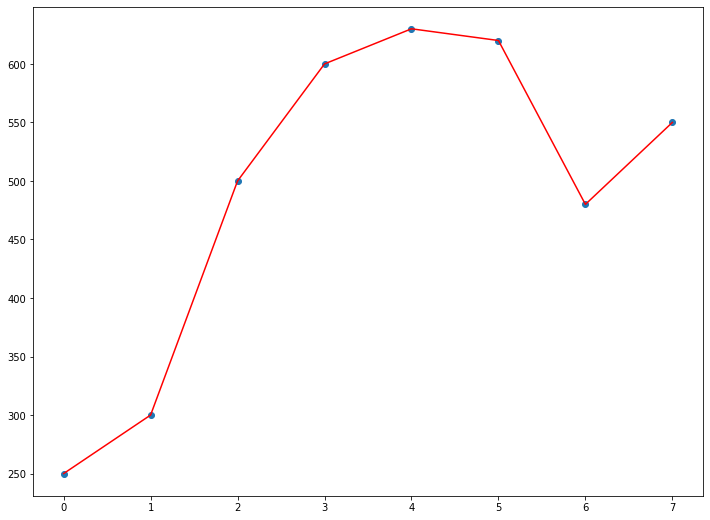

In [14]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression() 
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.figure(figsize=(12,9))

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('MSE:', rmse)
print('R2:', r2)
plt.scatter(df['Сила_удара'].index, df['Сила_удара'])

plt.plot(df['Сила_удара'].index, y_poly_pred, color='r')
plt.show()

In [15]:
pd.DataFrame({"перем-я":PolynomialFeatures(degree=3).fit(x).get_feature_names(x.columns), 
              "коэф-т":model.coef_})

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,перем-я,коэф-т
0,1,6.790998e-11
1,Выпрыгивания_10_сек,-1.143446e+00
2,Отжимания,-1.370990e+00
3,Выпрыгивания_10_сек^2,7.685816e+01
4,Выпрыгивания_10_сек Отжимания,-7.418706e+01
5,Отжимания^2,8.308342e+00
6,Выпрыгивания_10_сек^3,2.744770e-01
7,Выпрыгивания_10_сек^2 Отжимания,-3.677943e+00
8,Выпрыгивания_10_сек Отжимания^2,3.548087e+00
9,Отжимания^3,-6.340852e-01


In [16]:
x_res = model.predict(polynomial_features.fit_transform(pd.DataFrame(new_data)))
x_res, r2_score(test_res, x_res)

(array([620., 480.]), -5.500000000000182)

In [17]:
df['Результат'] = "слабо"
df.head()

,Выпрыгивания_10_сек,Отжимания,Сила_удара,Результат
0,8,20,250,слабо
1,9,20,300,слабо
2,16,25,500,слабо
3,15,40,600,слабо
4,15,35,630,слабо


In [18]:
condition = (df['Сила_удара'] > 500)
df.loc[condition, 'Результат'] = "сильно"
df.head()

,Выпрыгивания_10_сек,Отжимания,Сила_удара,Результат
0,8,20,250,слабо
1,9,20,300,слабо
2,16,25,500,слабо
3,15,40,600,сильно
4,15,35,630,сильно


Пример построения модели логистической регрессии. Несмотря на свое название, это линейная модель для классификации. Логистическая регрессия также известна как классификация с максимальной энтропией (MaxEnt) или логарифмический линейный классификатор. В этой модели вероятности, описывающие возможные результаты испытания, моделируются с использованием логистической функции. Эта реализация может соответствовать бинарной, или полиномиальной регрессии с дополнительной регуляризацией. Регуляризация применяется по умолчанию, что характерно для машинного обучения. Еще одним преимуществом регуляризации является то, что она улучшает стабильность модели. 

In [19]:
from sklearn.linear_model import LogisticRegression

In [31]:
# целевая переменная  является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
le.fit( df['Результат'] )

LabelEncoder()

In [35]:
le.classes_

array(['сильно', 'слабо'], dtype=object)

In [36]:
# пример "расшировки" столбца 

le.transform( [ 'сильно', 'слабо', 'сильно' ] )

array([0, 1, 0])

Обучим модель на имеющихся данных и убедимся, что она точно предсказала имеющиеся данные на примере первых трёх измерений. Все они отнесены к категории «слабо», причём результат с индексом 2 имеет достаточно слабую оценку и действительно результаты под этим индексом имеют граничный характер.

In [44]:
model = LogisticRegression()

In [58]:
# обучаем модель

model.fit(df[['Выпрыгивания_10_сек', 'Отжимания']],df['Результат'] )
predictions = model.predict_proba( df[['Выпрыгивания_10_сек', 'Отжимания']] )
predictions[:3]

array([[1.50376970e-05, 9.99984962e-01],
       [3.36450130e-05, 9.99966355e-01],
       [1.15764212e-01, 8.84235788e-01]])

Теперь введём новые данные причём последнее значение сделаем «выбросом», то есть по всем признакам это должно быть «сильно», но результат – «слабо». Это сделано чтобы принудительно заставить модель ошибиться и показать значительное негативное влияние «выбросов» на подобные модели.

In [69]:
new_data = {
    'Выпрыгивания_10_сек': [17, 16, 12, 18],
    'Отжимания': [30, 29, 20, 28]
}

test_res =  ['сильно', 'сильно', 'слабо', 'слабо']

Все измерения были предсказаны правильно, кроме последнего и так как мы подали для классификации только четыре переменные, то и продуктивность получили 0,75. При увеличении размеров датасета получим более точные результаты.

In [70]:
x_res = model.predict(pd.DataFrame(new_data))
x_res

array(['сильно', 'сильно', 'слабо', 'сильно'], dtype=object)

In [71]:
model.score(pd.DataFrame(new_data), pd.DataFrame(test_res))

0.75

Кроме того, имеется очень большое количество других эффективных инструментов машинного обучения, но для первого шага достаточно освоить рассмотренные выше модели, которые имеют высокую объяснительную способность и легко могут интерпретироваться практиками в спорте.